# Part 1: Sales and Profitability Analysis


In [54]:
import pandas as pd
import matplotlib.pyplot as plt


## # Load Datasets


In [2]:
List_of_Orders = pd.read_csv('/content/List_of_Orders_55FFC79CF8.csv')
order_details = pd.read_csv('/content/Order_Details_19795F61CF.csv')


In [9]:
order_details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [11]:
order_details.tail()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
1495,B-26099,835.0,267.0,5,Electronics,Phones
1496,B-26099,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,828.0,230.0,2,Furniture,Chairs
1498,B-26100,34.0,10.0,2,Clothing,T-shirt
1499,B-26100,72.0,16.0,2,Clothing,Shirt


In [16]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


In [10]:
List_of_Orders.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [12]:
List_of_Orders.tail()

,Order ID,Order Date,CustomerName,State,City
555,NaN,NaN,NaN,NaN,NaN
556,NaN,NaN,NaN,NaN,NaN
557,NaN,NaN,NaN,NaN,NaN
558,NaN,NaN,NaN,NaN,NaN
559,NaN,NaN,NaN,NaN,NaN


In [17]:
List_of_Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB


## # Merge the Datasets on 'Order ID'

In [4]:
merged_data = pd.merge(order_details, List_of_Orders, on = 'Order ID', how = 'inner' )

In [13]:
merged_data.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Pearl,Maharashtra,Pune


In [14]:
merged_data.tail()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
1495,B-26099,835.0,267.0,5,Electronics,Phones,30-03-2019,Bhishm,Maharashtra,Mumbai
1496,B-26099,2366.0,552.0,5,Clothing,Trousers,30-03-2019,Bhishm,Maharashtra,Mumbai
1497,B-26100,828.0,230.0,2,Furniture,Chairs,31-03-2019,Hitika,Madhya Pradesh,Indore
1498,B-26100,34.0,10.0,2,Clothing,T-shirt,31-03-2019,Hitika,Madhya Pradesh,Indore
1499,B-26100,72.0,16.0,2,Clothing,Shirt,31-03-2019,Hitika,Madhya Pradesh,Indore


In [15]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
 6   Order Date    1500 non-null   object 
 7   CustomerName  1500 non-null   object 
 8   State         1500 non-null   object 
 9   City          1500 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 117.3+ KB


## # Calculate Total Sales(Amount) For Each Category

In [5]:
total_sales_by_category = merged_data.groupby('Category')['Amount'].sum().reset_index()
total_sales_by_category.rename(columns={'Amount': 'Total Sales'}, inplace=True)

In [18]:
total_sales_by_category

,Category,Total Sales
0,Clothing,139054.0
1,Electronics,165267.0
2,Furniture,127181.0


### # Plot the trends to visualize

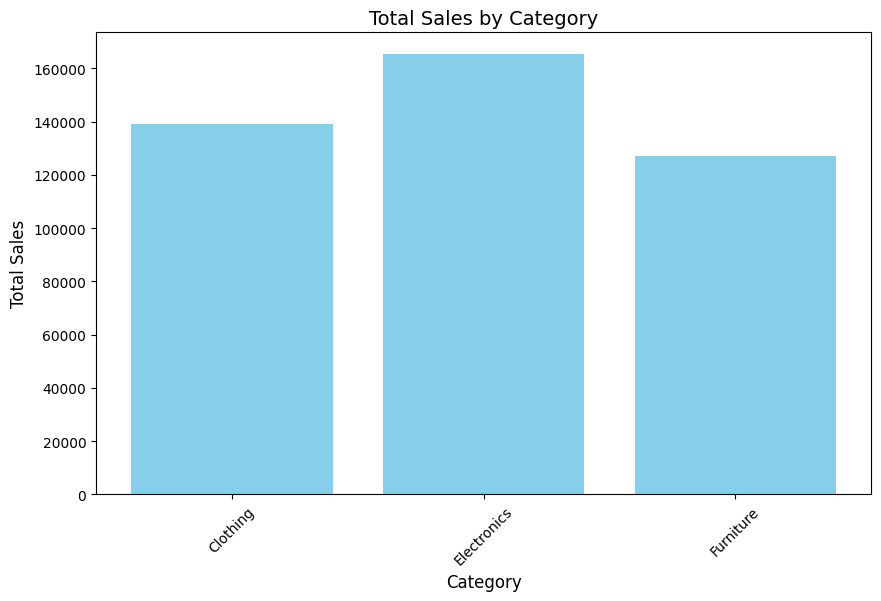

In [56]:
plt.figure(figsize=(10,6))
plt.bar(total_sales_by_category['Category'], total_sales_by_category['Total Sales'], color='skyblue')
plt.title('Total Sales by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## # Calculate average profit per order and total profit margin for each category


In [6]:
category_metrics = merged_data.groupby('Category').agg(
    Total_Sales=('Amount', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Order_Count=('Order ID', 'count')
).reset_index()

category_metrics['Avg_Profit_Per_Order'] = category_metrics['Total_Profit'] / category_metrics['Order_Count']
category_metrics['Profit_Margin_Percentage'] = (category_metrics['Total_Profit'] / category_metrics['Total_Sales']) * 100

In [19]:
category_metrics

,Category,Total_Sales,Total_Profit,Order_Count,Avg_Profit_Per_Order,Profit_Margin_Percentage
0,Clothing,139054.0,11163.0,949,11.762908,8.027817
1,Electronics,165267.0,10494.0,308,34.071429,6.349725
2,Furniture,127181.0,2298.0,243,9.456790,1.806874


##  # Sort categories by performance metrics


#### # Top and Underperforming categories


In [22]:
top_performing = category_metrics.sort_values(by='Profit_Margin_Percentage', ascending=False).head(3)
under_performing = category_metrics.sort_values(by='Profit_Margin_Percentage', ascending=True).head(3)


In [24]:
top_performing

,Category,Total_Sales,Total_Profit,Order_Count,Avg_Profit_Per_Order,Profit_Margin_Percentage
0,Clothing,139054.0,11163.0,949,11.762908,8.027817
1,Electronics,165267.0,10494.0,308,34.071429,6.349725
2,Furniture,127181.0,2298.0,243,9.456790,1.806874


In [25]:
under_performing

,Category,Total_Sales,Total_Profit,Order_Count,Avg_Profit_Per_Order,Profit_Margin_Percentage
2,Furniture,127181.0,2298.0,243,9.456790,1.806874
1,Electronics,165267.0,10494.0,308,34.071429,6.349725
0,Clothing,139054.0,11163.0,949,11.762908,8.027817


# Part 2: Target Achievement Analysis

### # Load Dataset

In [26]:
sales_target_data = pd.read_csv('/content/Sales_target_DD2E9B96A0.csv')

In [27]:
sales_target_data.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [28]:
sales_target_data.tail()

,Month of Order Date,Category,Target
31,Nov-18,Electronics,9000.0
32,Dec-18,Electronics,9000.0
33,Jan-19,Electronics,16000.0
34,Feb-19,Electronics,16000.0
35,Mar-19,Electronics,16000.0


In [29]:
sales_target_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  36 non-null     object 
 1   Category             36 non-null     object 
 2   Target               36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 996.0+ bytes


### # Convert the 'Date' column to a datetime format


In [46]:
sales_target_data['Month of Order Date'] = pd.to_datetime(sales_target_data['Month of Order Date'], format='%b-%y')


### # Filter data for the Furniture category


In [47]:
furniture_data = sales_target_data[sales_target_data['Category'] == 'Furniture']

In [48]:
furniture_data

,Month of Order Date,Category,Target
0,2018-04-01,Furniture,10400.0
1,2018-05-01,Furniture,10500.0
2,2018-06-01,Furniture,10600.0
3,2018-07-01,Furniture,10800.0
4,2018-08-01,Furniture,10900.0
5,2018-09-01,Furniture,11000.0
6,2018-10-01,Furniture,11100.0
7,2018-11-01,Furniture,11300.0
8,2018-12-01,Furniture,11400.0
9,2019-01-01,Furniture,11500.0


### # Calculate month-over-month (MoM) percentage change in target sales


In [50]:
furniture_data.loc[:, 'MoM Percentage Change'] = furniture_data['Target'].pct_change() * 100


In [51]:
furniture_data.loc[:, 'MoM Percentage Change']

,MoM Percentage Change
0,NaN
1,0.961538
2,0.952381
3,1.886792
4,0.925926
5,0.917431
6,0.909091
7,1.801802
8,0.884956
9,0.877193


#### # Identify significant target fluctuations (highest percentage changes)


In [52]:
significant_fluctuations = furniture_data[['Month of Order Date', 'Target', 'MoM Percentage Change']].sort_values(by='MoM Percentage Change', ascending=False)


In [53]:
significant_fluctuations

,Month of Order Date,Target,MoM Percentage Change
3,2018-07-01,10800.0,1.886792
7,2018-11-01,11300.0,1.801802
11,2019-03-01,11800.0,1.724138
1,2018-05-01,10500.0,0.961538
2,2018-06-01,10600.0,0.952381
4,2018-08-01,10900.0,0.925926
5,2018-09-01,11000.0,0.917431
6,2018-10-01,11100.0,0.909091
8,2018-12-01,11400.0,0.884956
9,2019-01-01,11500.0,0.877193


###  # Plot the trends to visualize

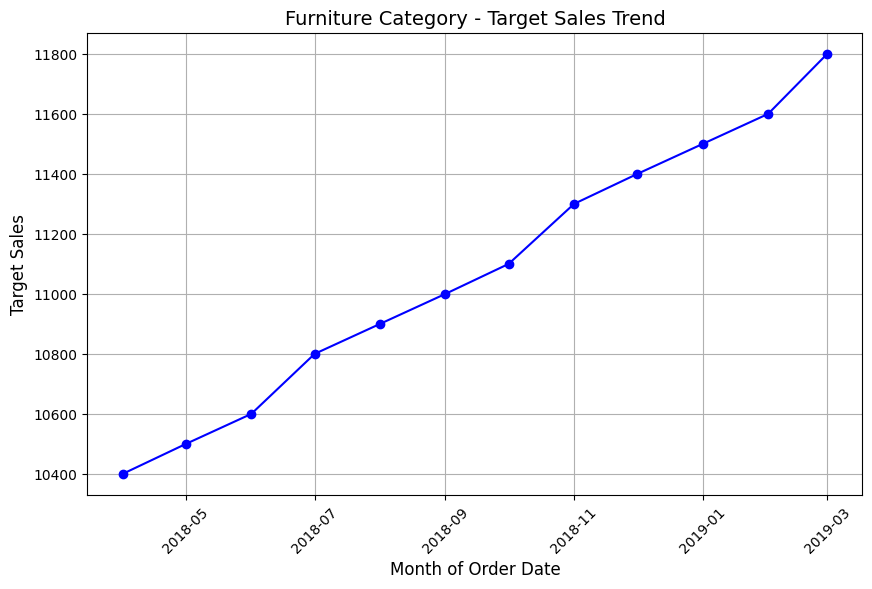

In [55]:
plt.figure(figsize=(10,6))
plt.plot(furniture_data['Month of Order Date'], furniture_data['Target'], marker='o', linestyle='-', color='b')
plt.title('Furniture Category - Target Sales Trend', fontsize=14)
plt.xlabel('Month of Order Date', fontsize=12)
plt.ylabel('Target Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Part 3: Regional Performance Insights



## ### STATE-LEVEL ANALYSIS ###


### # The top 5 and bottom 5 states with the highest order count

---




In [66]:
state_order_counts = merged_data.groupby('State')['Order ID'].count().reset_index()
state_order_counts.rename(columns={'Order ID': 'Order_Count'}, inplace=True)



### # Get top 5 and bottom 5 states



In [67]:
top_5_states = state_order_counts.sort_values(by='Order_Count', ascending=False).head(5)
bottom_5_states = state_order_counts.sort_values(by='Order_Count', ascending=True).head(5)

In [68]:
top_5_states

,State,Order_Count
10,Madhya Pradesh,340
11,Maharashtra,290
4,Gujarat,87
2,Delhi,74
14,Rajasthan,74


In [69]:
bottom_5_states

,State,Order_Count
15,Sikkim,24
16,Tamil Nadu,25
5,Haryana,26
6,Himachal Pradesh,29
0,Andhra Pradesh,42


### # Total sales and average profit for these states


In [60]:
state_metrics = merged_data.groupby('State').agg(
    Total_Sales=('Amount', 'sum'),
    Average_Profit=('Profit', 'mean')
).reset_index()

#### # Merge the order count with the total sales and average profit for top 5 and bottom 5 states


In [70]:
top_5_states_metrics = pd.merge(top_5_states, state_metrics, on='State')
bottom_5_states_metrics = pd.merge(bottom_5_states, state_metrics, on='State')


In [71]:
top_5_states_metrics

,State,Order_Count,Total_Sales,Average_Profit
0,Madhya Pradesh,340,105140.0,16.326471
1,Maharashtra,290,95348.0,21.296552
2,Gujarat,87,21058.0,5.344828
3,Delhi,74,22531.0,40.364865
4,Rajasthan,74,21149.0,16.986486


In [72]:
bottom_5_states_metrics

,State,Order_Count,Total_Sales,Average_Profit
0,Sikkim,24,5276.0,16.708333
1,Tamil Nadu,25,6087.0,-88.640000
2,Haryana,26,8863.0,50.961538
3,Himachal Pradesh,29,8666.0,22.620690
4,Andhra Pradesh,42,13256.0,-11.809524


## ### CITY-LEVEL ANALYSIS ###


###  # The top 5 and bottom 5 cities with the highest order count

In [73]:
city_order_counts = merged_data.groupby('City')['Order ID'].count().reset_index()
city_order_counts.rename(columns={'Order ID': 'Order_Count'}, inplace=True)


In [75]:
city_order_counts

,City,Order_Count
0,Ahmedabad,62
1,Allahabad,30
2,Amritsar,15
3,Bangalore,54
4,Bhopal,66
5,Chandigarh,71
6,Chennai,25
7,Delhi,81
8,Gangtok,24
9,Goa,43


### # Top 5 and ottom 5 cities

In [74]:
top_5_cities = city_order_counts.sort_values(by='Order_Count', ascending=False).head(5)
bottom_5_cities = city_order_counts.sort_values(by='Order_Count', ascending=True).head(5)


In [76]:
top_5_cities

,City,Order_Count
11,Indore,267
17,Mumbai,207
19,Pune,83
7,Delhi,81
5,Chandigarh,71


In [77]:
bottom_5_cities

,City,Order_Count
2,Amritsar,15
8,Gangtok,24
21,Surat,25
6,Chennai,25
20,Simla,29


### #Calculate total sales and average profit for these cities

In [79]:
city_metrics = merged_data.groupby('City').agg(
    Total_Sales=('Amount', 'sum'),
    Average_Profit=('Profit', 'mean')
).reset_index()

### #Merge with top and bottom cities

In [80]:
top_5_cities_metrics = pd.merge(top_5_cities, city_metrics, on='City')
bottom_5_cities_metrics = pd.merge(bottom_5_cities, city_metrics, on='City')

In [81]:
top_5_cities_metrics

,City,Order_Count,Total_Sales,Average_Profit
0,Indore,267,79069.0,15.576779
1,Mumbai,207,61867.0,7.908213
2,Pune,83,33481.0,54.686747
3,Delhi,81,25019.0,43.308642
4,Chandigarh,71,21142.0,2.422535


In [82]:
bottom_5_cities_metrics

,City,Order_Count,Total_Sales,Average_Profit
0,Amritsar,15,4507.0,36.266667
1,Gangtok,24,5276.0,16.708333
2,Surat,25,6828.0,53.800000
3,Chennai,25,6087.0,-88.640000
4,Simla,29,8666.0,22.620690


### #  Highlight regional disparities
### # Analyze sales and profit disparity


## ### STATE-LEVEL ANALYSIS ###

In [87]:
top_5_states_metrics['Sales_Profit_Ratio'] = top_5_states_metrics['Total_Sales'] / top_5_states_metrics['Average_Profit']
bottom_5_states_metrics['Sales_Profit_Ratio'] = bottom_5_states_metrics['Total_Sales'] / bottom_5_states_metrics['Average_Profit']

In [85]:
top_5_states_metrics

,State,Order_Count,Total_Sales,Average_Profit,Sales_Profit_Ratio
0,Madhya Pradesh,340,105140.0,16.326471,6439.848676
1,Maharashtra,290,95348.0,21.296552,4477.156736
2,Gujarat,87,21058.0,5.344828,3939.883871
3,Delhi,74,22531.0,40.364865,558.183462
4,Rajasthan,74,21149.0,16.986486,1245.048528


In [88]:
bottom_5_states_metrics

,State,Order_Count,Total_Sales,Average_Profit,Sales_Profit_Ratio
0,Sikkim,24,5276.0,16.708333,315.770574
1,Tamil Nadu,25,6087.0,-88.640000,-68.671029
2,Haryana,26,8863.0,50.961538,173.915472
3,Himachal Pradesh,29,8666.0,22.620690,383.100610
4,Andhra Pradesh,42,13256.0,-11.809524,-1122.483871


## ### City-LEVEL ANALYSIS ###

In [90]:
top_5_cities_metrics['Sales_Profit_Ratio'] = top_5_cities_metrics['Total_Sales'] / top_5_cities_metrics['Average_Profit']
bottom_5_cities_metrics['Sales_Profit_Ratio'] = bottom_5_cities_metrics['Total_Sales'] / bottom_5_cities_metrics['Average_Profit']

In [91]:
top_5_cities_metrics

,City,Order_Count,Total_Sales,Average_Profit,Sales_Profit_Ratio
0,Indore,267,79069.0,15.576779,5076.081510
1,Mumbai,207,61867.0,7.908213,7823.133170
2,Pune,83,33481.0,54.686747,612.232430
3,Delhi,81,25019.0,43.308642,577.690707
4,Chandigarh,71,21142.0,2.422535,8727.220930


In [92]:
bottom_5_cities_metrics

,City,Order_Count,Total_Sales,Average_Profit,Sales_Profit_Ratio
0,Amritsar,15,4507.0,36.266667,124.273897
1,Gangtok,24,5276.0,16.708333,315.770574
2,Surat,25,6828.0,53.800000,126.914498
3,Chennai,25,6087.0,-88.640000,-68.671029
4,Simla,29,8666.0,22.620690,383.100610
